In [1]:
import numpy as np
import os
import pickle

# IMPORTO I DATI PER VOTTIGNASCO

# Ottieni il percorso effettivo da una variabile d'ambiente
work_path = os.environ['WORK']  # Ottieni il valore della variabile d'ambiente WORK
v_test_OHE_path = "/leonardo_work/try25_pellegrino/Water_Resources/rise-video/data/Vottignasco/Vottignasco_00425010001_test_month_OHE.npy"
v_test_image_path = "/leonardo_work/try25_pellegrino/Water_Resources/rise-video/data/Vottignasco/Vottignasco_00425010001_test_normalized_image_sequences.npy"
v_test_target_dates_path = "/leonardo_work/try25_pellegrino/Water_Resources/rise-video/data/Vottignasco/Vottignasco_00425010001_test_target_dates.npy"
v_test_images_dates = "/leonardo_work/try25_pellegrino/Water_Resources/rise-video/data/Vottignasco/Vottignasco_00425010001_test_image_sequences_dates.npy"
v_test_normalization_factors_std_path  = "/leonardo_work/try25_pellegrino/Water_Resources/rise-video/data/Vottignasco/normalization_factors/Vottignasco_00425010001_training_target_std.npy"
v_test_normalization_factors_mean_path = "/leonardo_work/try25_pellegrino/Water_Resources/rise-video/data/Vottignasco/normalization_factors/Vottignasco_00425010001_training_target_mean.npy"

# Carica l'array numpy dai file
vottignasco_test_OHE         = np.load(v_test_OHE_path)
vottignasco_test_image       = np.load(v_test_image_path)
vottignasco_test_dates       = np.load(v_test_target_dates_path)
vottignasco_test_image_dates = np.load(v_test_images_dates)
vott_target_test_std         = np.load(v_test_normalization_factors_std_path) 
vott_target_test_mean        = np.load(v_test_normalization_factors_mean_path)


print(len(vottignasco_test_dates))
print(len(vottignasco_test_image))
print(len(vottignasco_test_OHE))

105
105
105


In [2]:
import sys 

# Aggiungi il percorso della cartella XAI (risali di tre livelli dal notebook)
xai_path = os.path.abspath(os.path.join('..', '..', '..'))
sys.path.append(xai_path)

In [3]:
from common import plots

import importlib

# Forza il reload del modulo
importlib.reload(plots)

<module 'common.plots' from '/leonardo_work/try25_pellegrino/Water_Resources/rise-video/XAI/common/plots.py'>

In [5]:
import matplotlib.pyplot as plt
import os

total_auc_insertion_s2_all = []
total_auc_deletion_s2_all  = []

total_auc_insertion_s3_all = []
total_auc_deletion_s3_all  = []

total_auc_insertion_s4_all = []
total_auc_deletion_s4_all  = []

l_values = [4,8,12,13,16]
p_values = [1,2,3,4,5,6,7,8,9]

for l in l_values:
    for p in p_values:

        path_to_load_results = f"/leonardo_work/try25_pellegrino/Water_Resources/rise-video/XAI/temporal/results/01_marco_temporal_rise_original_20250310173717/rise_temporal_original_result_setup_l_{l}_p_{p}.pkl"
        # Load della lista results
        with open(path_to_load_results, 'rb') as file:
            result = pickle.load(file)
        
        param = result["parameters_comb"]
        #only_h_w_param = param[0:5]

        # Percorso dove salvare il plot
        output_dir = f"/leonardo_work/try25_pellegrino/Water_Resources/rise-video/XAI/temporal/scripts/notebooks/results/results_l{l}"
    
        
        #print(f"Plot salvato in: {output_path}")

        for index_i in range(2,5):
            s_i_errors_insertion = result["errors_insertion"][:,index_i-1,:]
            s_i_errors_deletion  = result["errors_deletion"][:,index_i-1,:]

            output_path_ins_del = os.path.join(output_dir, f"{param}_ins_del_S_{index_i}.png")
            auc_insertion_s_i,auc_deletion_s_i = plots.plot_combined_curves(s_i_errors_insertion, s_i_errors_deletion, title=f"Ins/Del Mean Curves S{index_i}_{param}", save=True,
                                                                       save_path=output_path_ins_del)
        
            if (index_i == 2):
                total_auc_insertion_s2_all.append([auc_insertion_s_i, param])
                total_auc_deletion_s2_all.append([auc_deletion_s_i, param])
            elif (index_i == 3):
                total_auc_insertion_s3_all.append([auc_insertion_s_i, param])
                total_auc_deletion_s3_all.append([auc_deletion_s_i, param])
            else:
                total_auc_insertion_s4_all.append([auc_insertion_s_i, param])
                total_auc_deletion_s4_all.append([auc_deletion_s_i, param])

            plt.close()

            print(f"Plot salvato in: {output_path_ins_del}")

Plot salvato in: /leonardo_work/try25_pellegrino/Water_Resources/rise-video/XAI/temporal/scripts/notebooks/results/results_l4/l_4_p_1_ins_del_S_2.png
Plot salvato in: /leonardo_work/try25_pellegrino/Water_Resources/rise-video/XAI/temporal/scripts/notebooks/results/results_l4/l_4_p_1_ins_del_S_3.png
Plot salvato in: /leonardo_work/try25_pellegrino/Water_Resources/rise-video/XAI/temporal/scripts/notebooks/results/results_l4/l_4_p_1_ins_del_S_4.png
Plot salvato in: /leonardo_work/try25_pellegrino/Water_Resources/rise-video/XAI/temporal/scripts/notebooks/results/results_l4/l_4_p_2_ins_del_S_2.png
Plot salvato in: /leonardo_work/try25_pellegrino/Water_Resources/rise-video/XAI/temporal/scripts/notebooks/results/results_l4/l_4_p_2_ins_del_S_3.png
Plot salvato in: /leonardo_work/try25_pellegrino/Water_Resources/rise-video/XAI/temporal/scripts/notebooks/results/results_l4/l_4_p_2_ins_del_S_4.png
Plot salvato in: /leonardo_work/try25_pellegrino/Water_Resources/rise-video/XAI/temporal/scripts/not

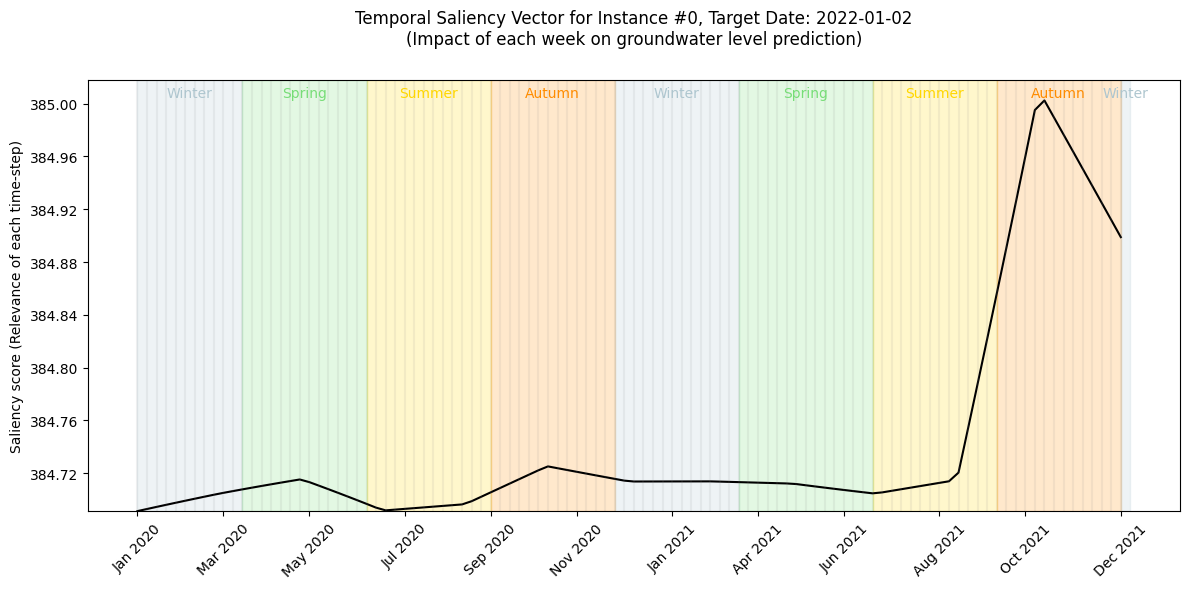

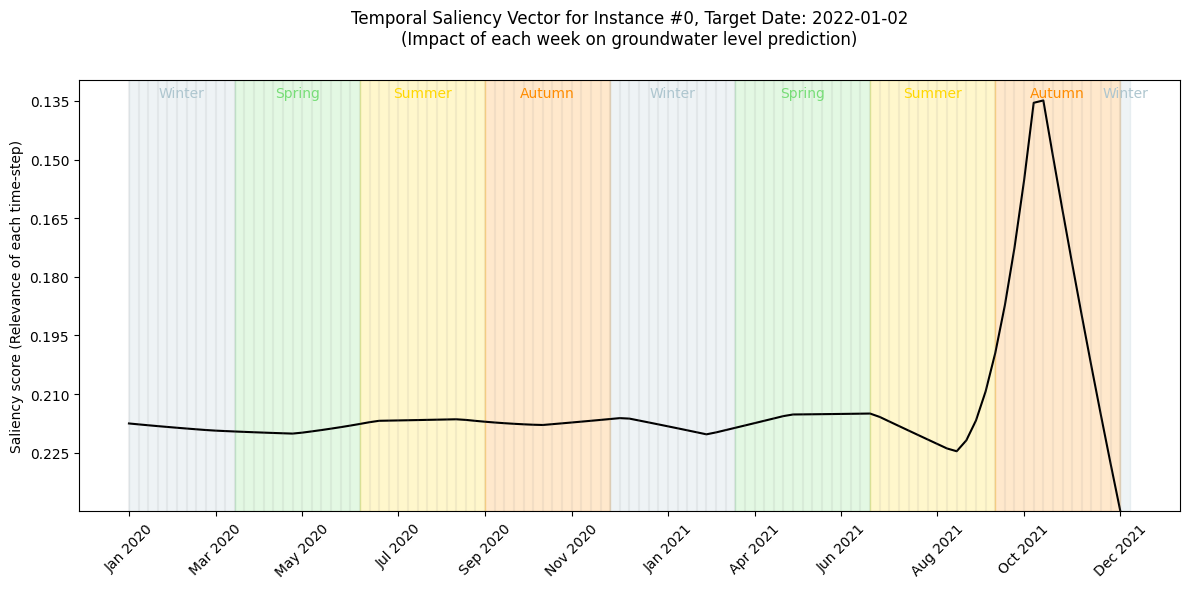

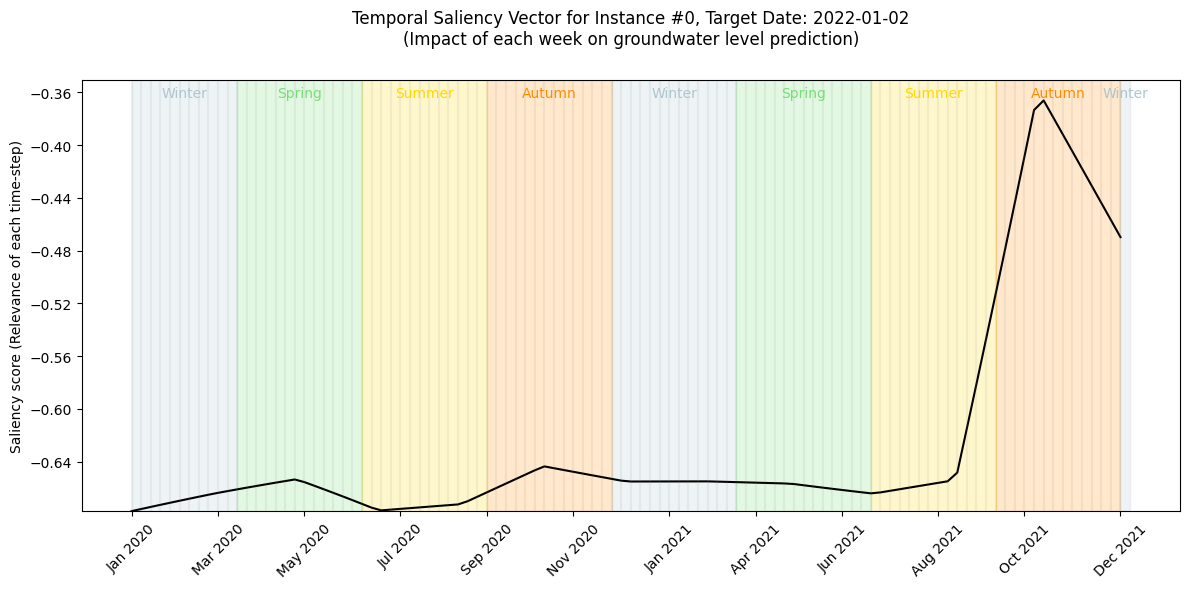

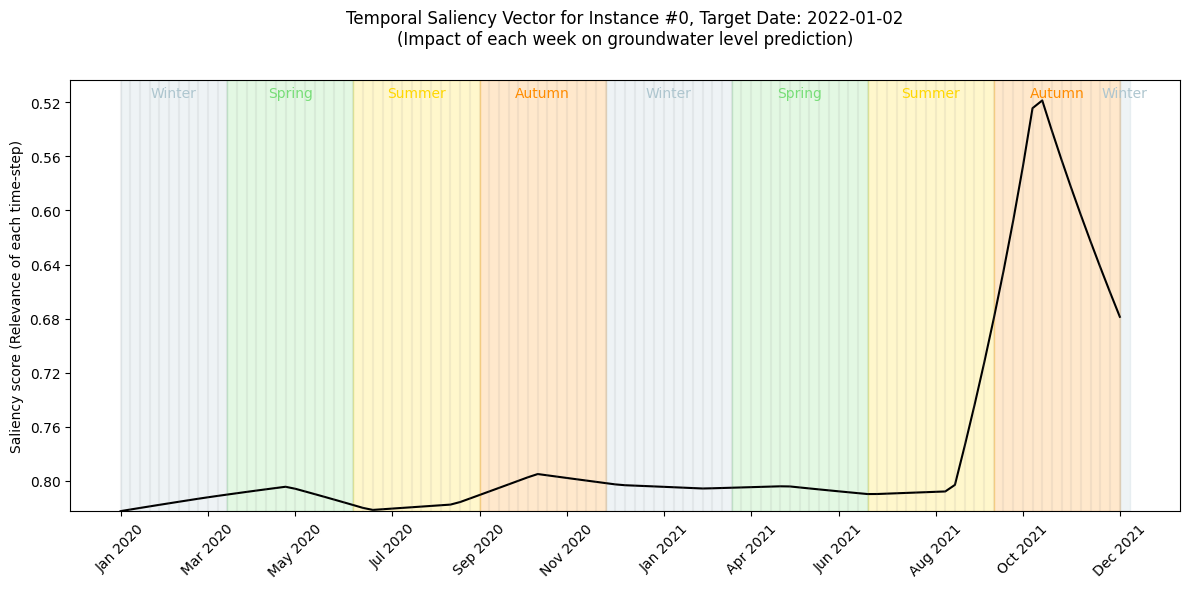

In [15]:
path_to_load_results = f"/leonardo_work/try25_pellegrino/Water_Resources/rise-video/XAI/temporal/results/01_marco_temporal_rise_original_20250310173717/rise_temporal_original_result_setup_l_{13}_p_{6}.pkl"
        # Load della lista results
with open(path_to_load_results, 'rb') as file:
    result = pickle.load(file)

nr_instance = 0
for index_i in range(1,5):
    s_i = result["saliency_vectors"][nr_instance][index_i-1]

    mode = "standard" if index_i not in [2, 4] else "to_zero"

    plots.plot_saliency_vector(s_i, vottignasco_test_dates, vottignasco_test_image_dates, nr_instance, mode=mode)

In [6]:
import matplotlib.pyplot as plt
from collections import defaultdict

def plot_grouped_auc(data, title='AUC Comparison for Different Groups'):
    """
    Plotta un grafico comparativo delle AUC raggruppate per cluster (es. l_X),
    con i punti distribuiti orizzontalmente all'interno di ogni gruppo.

    Args:
    - data (list of lists): Ogni elemento è una coppia [AUC, configurazione] (es. 'l_2_p_1')
    - title (str): Titolo del grafico
    """

    # Raggruppa le AUC per ogni gruppo l_X
    grouped = defaultdict(list)
    for auc, param in data:
        group = "_".join(param.split('_')[:2])  # Estrae 'l_X' (ignora 'p_Y')
        grouped[group].append((auc, param))
    
    # Ordina i gruppi l_X in ordine crescente
    grouped = dict(sorted(grouped.items(), key=lambda x: int(x[0].split('_')[1])))

    # Posizioni dei gruppi sull'asse x (1, 2, 3, ...)
    group_positions = list(range(len(grouped)))

    plt.figure(figsize=(12, 6))

    # Plotta ogni gruppo e i suoi punti p_Y
    for i, (group, values) in enumerate(grouped.items()):
        auc_values = [item[0] for item in values]
        p_labels = [item[1].split('_')[-1] for item in values]  # 'p_1', 'p_2', ...
        
        # Sposta orizzontalmente i punti all'interno del gruppo
        x_positions = [i + (j - len(values) / 2) * 0.1 for j in range(len(values))]

        # Plotta i punti
        plt.scatter(x_positions, auc_values, label=group)

        # Aggiungi etichette p_Y accanto ai punti
        for x, auc, p_label in zip(x_positions, auc_values, p_labels):
            plt.annotate(p_label, (x, auc), textcoords="offset points", xytext=(5,5), fontsize=8)

    # Configurazione del grafico
    plt.xticks(group_positions, grouped.keys(), rotation=45, ha='right')
    plt.title(title)
    plt.xlabel('Groups (l_X)')
    plt.ylabel('AUC')
    plt.legend(title="Groups")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

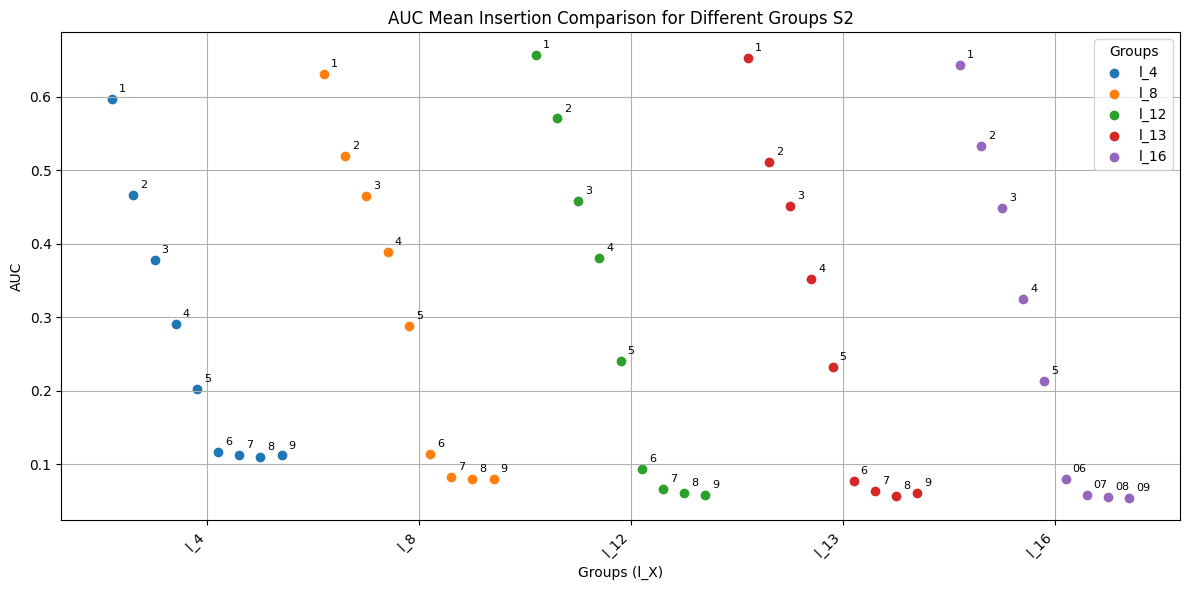

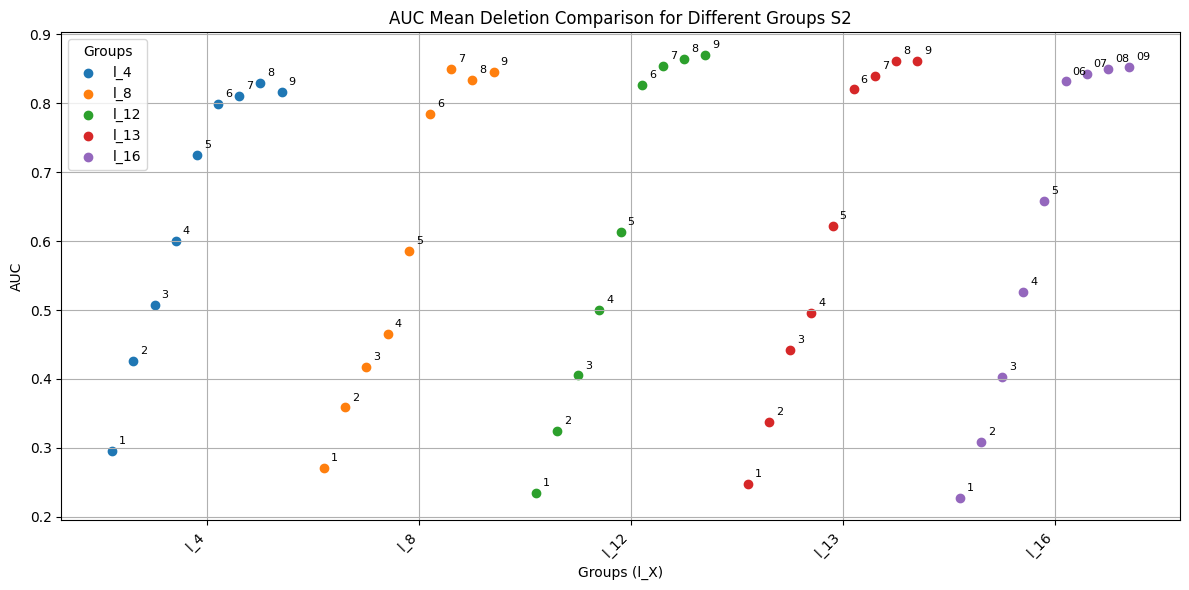

In [7]:
plot_grouped_auc(total_auc_insertion_s2_all, title="AUC Mean Insertion Comparison for Different Groups S2")
plot_grouped_auc(total_auc_deletion_s2_all, title="AUC Mean Deletion Comparison for Different Groups S2")

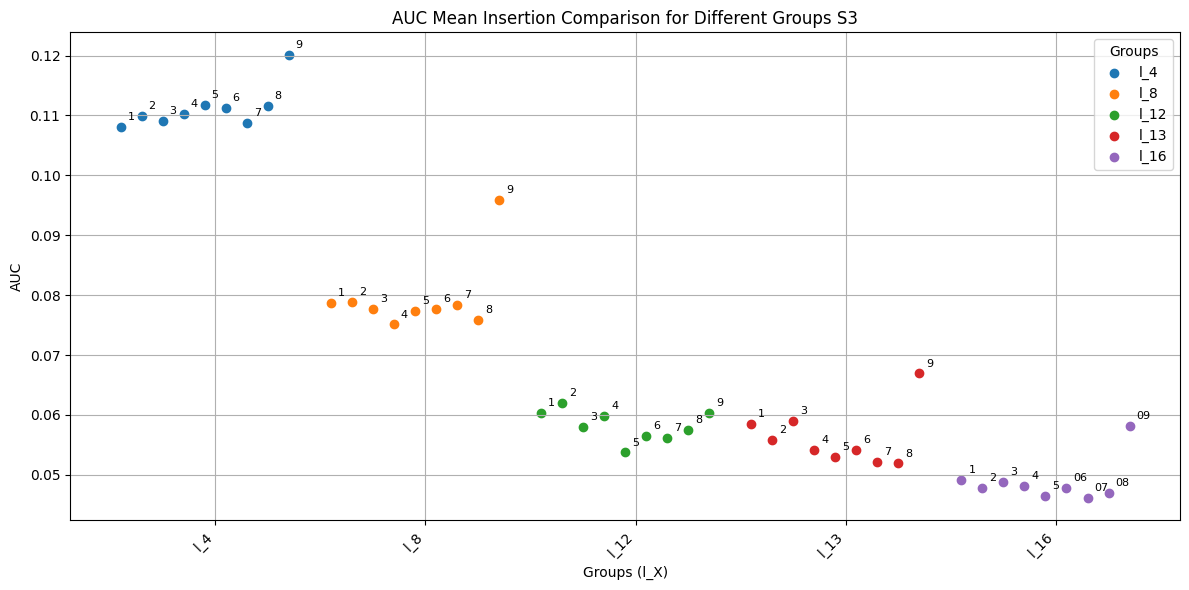

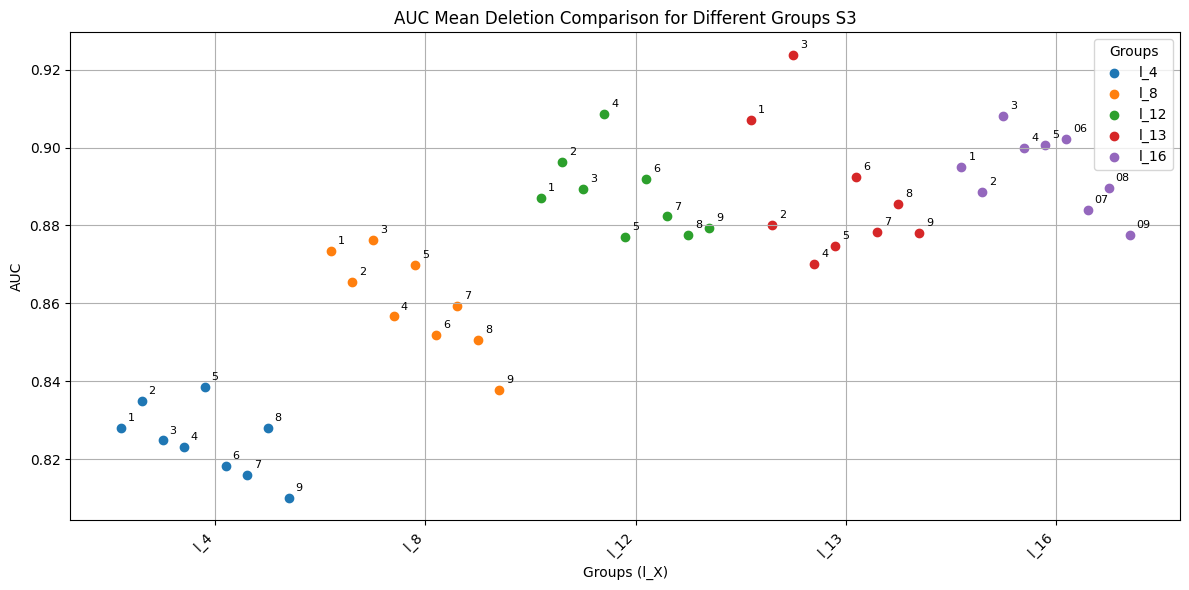

In [8]:
plot_grouped_auc(total_auc_insertion_s3_all, title="AUC Mean Insertion Comparison for Different Groups S3")
plot_grouped_auc(total_auc_deletion_s3_all, title="AUC Mean Deletion Comparison for Different Groups S3")

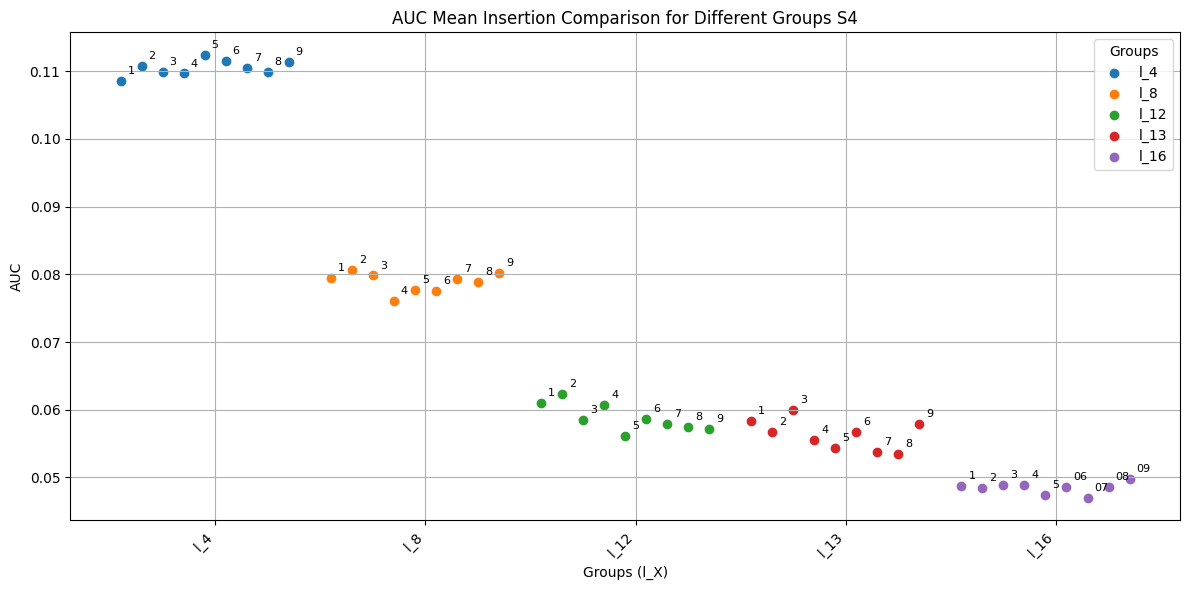

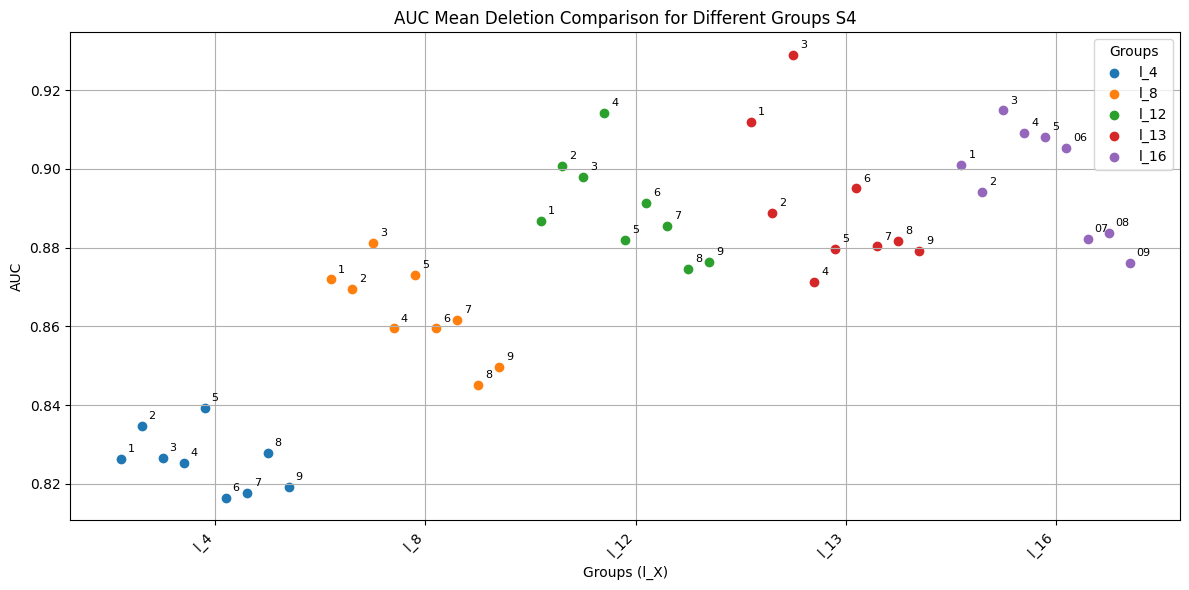

In [9]:
plot_grouped_auc(total_auc_insertion_s4_all, title="AUC Mean Insertion Comparison for Different Groups S4")
plot_grouped_auc(total_auc_deletion_s4_all, title="AUC Mean Deletion Comparison for Different Groups S4")